# 독립 표본 t-검정(이표본 검정, Independent two sample T-test)

서로 다른 두개의 그룹 간 평균의 차이가 유의미한지 여부를 판단

## #01. 작업준비

### 패키지 참조

In [1]:
from scipy import stats
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sb

## #02. 예제(1) - 지혈제 효과 비교

### 데이터 가져오기

두 종료의 지혈제 효과를 측정한 자료이다.

총 14명이 실험에 참여했으며 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 다음, 한 그룹에는 지혈제 B를, 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정하였다.

In [2]:
df = read_excel("https://data.hossam.kr/E02/styptic.xlsx")
df

,B,G
0,8.80,9.9
1,8.40,9.0
2,7.90,11.1
3,8.70,9.6
4,9.10,8.7
5,9.60,10.4
6,8.75,9.5


### 두 그룹의 분산 확인

In [3]:
var1 = df['B'].var()
var2 = df['G'].var()
var1, var2

(0.2824999999999997, 0.6695238095238097)

### 커널 밀도 그래프

두 그룹에 데이터 분포가 서로 다름이 확인됨

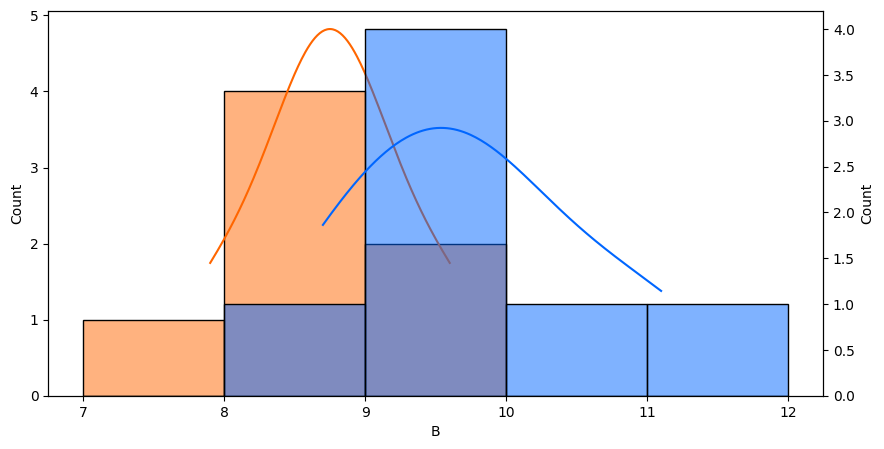

In [4]:
bins = [7,8,9,10,11,12]

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()
sb.histplot(data=df, x='B', bins=bins, kde=True, ax=ax1, color='#ff6600')
sb.histplot(data=df, x='G', bins=bins, kde=True, ax=ax2, color='#0066ff')
plt.show()
plt.close()

### T-Test 시행

#### Case 1

| 가설 | 내용 |
|--|--|
| 귀무가설 | B를 사용한 그룹과 G를 사용한 그룹의 지혈 시간에는 차이가 없다. |
| 대립가설 | B를 사용한 그룹과 G를 사용한 그룹의 지혈 시간에는 차이가 있다. |

두 그룹간 평균에 차이가 있는지 검정

기본 파라미터로 사용시 `equal_var=True`, `alternative='two-sided'`로 설정됨

In [5]:
stats.ttest_ind(df['B'], df['G'])

TtestResult(statistic=-2.69222826574718, pvalue=0.01958895335130418, df=12.0)

##### 결과 해석

`p-value`가 0.05보다 작으므로($P < 0.05$) 지혈제 B를 사용한 그룹과 지혈제 G를 사용한 그룹간 평균 지혈시간에는 차이가 있다.

#### Case 2 - 공통 분산이 아님을 가정

`equal_var=False` 설정

In [6]:
stats.ttest_ind(df['B'], df['G'], equal_var=False, alternative='two-sided')

TtestResult(statistic=-2.69222826574718, pvalue=0.022077570616415278, df=10.29809053849377)

##### 결과 해석

`p-value`가 0.05보다 작으므로($P < 0.05$) 지혈제 B를 사용한 그룹과 지혈제 G를 사용한 그룹간 평균 지혈시간에는 차이가 있다.

#### Case 3

| 가설 | 내용 |
|--|--|
| 귀무가설 | 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 크지 않다. |
| 대립가설 | 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 크다. |

In [7]:
stats.ttest_ind(df['B'], df['G'], equal_var=False, alternative='greater')

TtestResult(statistic=-2.69222826574718, pvalue=0.9889612146917923, df=10.29809053849377)

##### 결과 해석

`p-value`가 0.05보다 크므로($P > 0.05$) 지혈제 B를 사용한 그룹의 평균 지혈 시간은 지혈제 G를 사용한 그룹의 평균 지혈시간보다 크지 않다.

#### Case 4

| 가설 | 내용 |
|--|--|
| 귀무가설 | 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 작지 않다. |
| 대립가설 | 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 작다. |

In [8]:
stats.ttest_ind(df['B'], df['G'], equal_var=False, alternative='less')

TtestResult(statistic=-2.69222826574718, pvalue=0.011038785308207639, df=10.29809053849377)

##### 결과 해석

`p-value`가 0.05보다 작으므로($P < 0.05$) 지혈제 B를 사용한 그룹의 평균 지혈 시간은 지혈제 G를 사용한 그룹의 평균 지혈시간 작다.

## #03. 예제(2) - 인공심장 효과 측정

자료는 두 독립적인 그룹의 심장병 환자에 대한 심장계수(cardiac index)를 측정한 것이다.

그룹 1은 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들이고,

그룹 2는 비정상으로 판명된 사람들이다.

심장계수는 수술 직후에 측정하였다.

이 두 그룹의 환자에게 부착한 인공장기의 기능에 따라 심장계수가 서로 차이가 나는지 알고 싶은 것이 이 실험의 목적이다.

(단, 두 그룹은 공통분산 가정에 어긋난다고 가정한다.)

### 데이터 가져오기

In [9]:
df = read_excel("https://data.hossam.kr/E02/heatrate.xlsx")
df

,그룹1,그룹2
0,3.84,3.97
1,2.60,2.50
2,1.19,2.70
3,2.00,3.36
4,6.20,3.55
5,0.96,2.97
6,5.50,3.20
7,3.18,2.30


### case 1

두 그룹간 심장계수의 차이가 있는지를 검정

| 가설 | 내용 |
|--|--|
| 귀무가설 | 두 그룹간 심장계수에는 차이가 없다 |
| 대립가설 | 두 그룹간 심장계수에는 차이가 있다 |

In [10]:
stats.ttest_ind(df['그룹1'], df['그룹2'], equal_var=False, alternative='two-sided')

TtestResult(statistic=0.16333115041045673, pvalue=0.8742117697901691, df=8.19961125071249)

#### 결과 해석

`p-value`가 `0.05`보다 크므로($P > 0.05$) 귀무가설을 기각할 수 없다. 다시 말해서 가설검정의 결과는 두 그룹의 심장계수가 같지 않다고 판단할 근거가 될 수 없다.

### case 2

| 가설 | 내용 |
|--|--|
| 귀무가설 | 그룹1의 심장계수가 그룹2의 심장계수보다 작지 않다. |
| 대립가설 | 그룹1의 심장계수가 그룹2의 심장계수보다 작다. |

In [11]:
stats.ttest_ind(df['그룹1'], df['그룹2'], equal_var=False, alternative='less')

TtestResult(statistic=0.16333115041045673, pvalue=0.5628941151049154, df=8.19961125071249)

#### 결과 해석

`p-value`가 `0.05`보다 크므로($P > 0.05$) 귀무가설을 기각할 수 없다.

### case 3

| 가설 | 내용 |
|--|--|
| 귀무가설 | 그룹1의 심장계수가 그룹2의 심장계수보다 크지 않다. |
| 대립가설 | 그룹1의 심장계수가 그룹2의 심장계수보다 크다. |

In [12]:
stats.ttest_ind(df['그룹1'], df['그룹2'], equal_var=False, alternative='greater')

TtestResult(statistic=0.16333115041045673, pvalue=0.43710588489508456, df=8.19961125071249)

#### 결과 해석

`p-value`가 `0.05`보다 크므로($P > 0.05$) 귀무가설을 기각할 수 없다.